In [1]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

Code for generating figures in the paper. The data tables were generated by `1.calculate-map.ipynb` and `2.calculate-map-dl.ipynb`.

In [2]:
cp_replicability_df = (
    pd.read_csv('output/cellprofiler_replicability.csv')
    .replace({'compound':'Compound',
              'crispr':'CRISPR',
              'orf':'ORF'})
    .assign(feature_set="CellProfiler")
)

dp_replicability_df = (
    pd.read_csv('output/deepprofiler_replicability.csv')
    .replace({'compound':'Compound',
              'crispr':'CRISPR',
              'orf':'ORF'})
    .assign(feature_set="DeepProfiler")
)

replicability_df = pd.concat([cp_replicability_df, dp_replicability_df], ignore_index=True, join="inner")

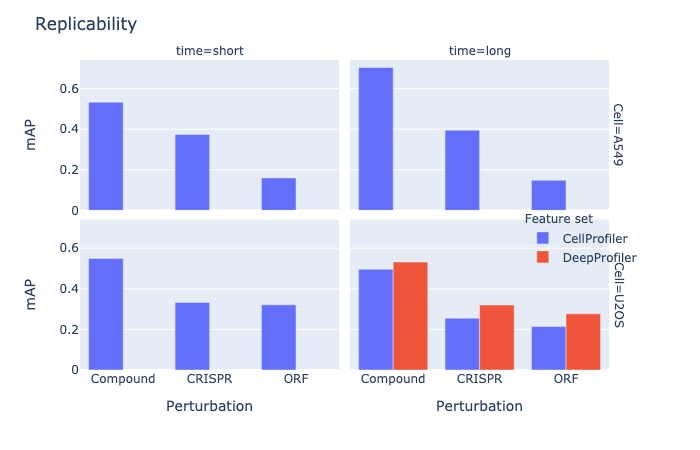

In [3]:
fig = px.bar(data_frame=replicability_df,
             x='Modality',
             y='mAP',
             color='feature_set',
             barmode='group',
             facet_row='Cell',
             facet_col='time')
fig.update_layout(title='Replicability',
                  xaxis1=dict(title='Perturbation'),
                  xaxis2=dict(title='Perturbation'),
                  yaxis1=dict(title='mAP'),
                  yaxis3=dict(title='mAP'),
                  legend=dict(x=0.82,
                              y=0.42,
                              title="Feature set",
                              bgcolor='rgba(0,0,0,0)'))
fig.show("png")
fig.write_image(f'figures/3.replicability_mAP.png', width=960, height=720, scale=2)

In [4]:
cp_biological_consistency_df = (
    pd.read_csv('output/cellprofiler_biological_consistency.csv')
    .replace({'compound':'Compound',
              'crispr':'CRISPR',
              'orf':'ORF'})
    .assign(feature_set="CellProfiler")
)

dp_biological_consistency_df = (
    pd.read_csv('output/deepprofiler_biological_consistency.csv')
    .replace({'compound':'Compound',
              'crispr':'CRISPR',
              'orf':'ORF'})
    .assign(feature_set="DeepProfiler")
)

biological_consistency_df = pd.concat([cp_biological_consistency_df, dp_biological_consistency_df], ignore_index=True, join="inner")

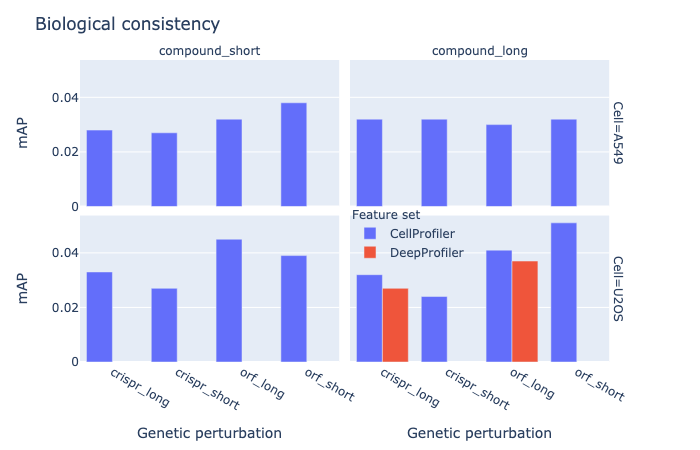

In [5]:
fig = px.bar(data_frame=biological_consistency_df,
             x='Modality2',
             y='mAP',
             color='feature_set',
             barmode='group',
             facet_col='Modality1',
             facet_row='Cell')
fig.update_layout(title='Biological consistency',
                  xaxis1=dict(title='Genetic perturbation'),
                  xaxis2=dict(title='Genetic perturbation'),
                  yaxis1=dict(title='mAP'),
                  yaxis3=dict(title='mAP'),
                  legend=dict(x=0.5,
                              y=0.42,
                              title="Feature set",
                              bgcolor='rgba(0,0,0,0)'))
fig.for_each_annotation(lambda a: a.update(text=a.text.replace("Modality1=", "")))
fig.show("png")
fig.write_image(f'figures/3.biological_consistency_mAP.png', width=960, height=720, scale=2)